# Setup 💻 (do not forget to run these cells before starting 👇)

## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Spotify dataset

In [18]:
df = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/spotify-dataset.csv')

----------

# Your Assignement starts here 🔥

## 1. Can you display the first 10 row of the dataset?

In [19]:
df.head(10)



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


## 2. Are there any missing values in the dataset?

In [20]:
df.isnull().sum()


,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0
key,0
liveness,0


## 3. How many songs are there in the dataset?

In [21]:
len(df)


169909

## 4. How many artists?

In [23]:
df['artists'].nunique()


33375

## 5. What's the average duration of a song, in minutes?

In [24]:
df['duration_ms'].mean() / 60000


np.float64(3.856769316222213)

## 6. Can you plot the distribution of the durations?

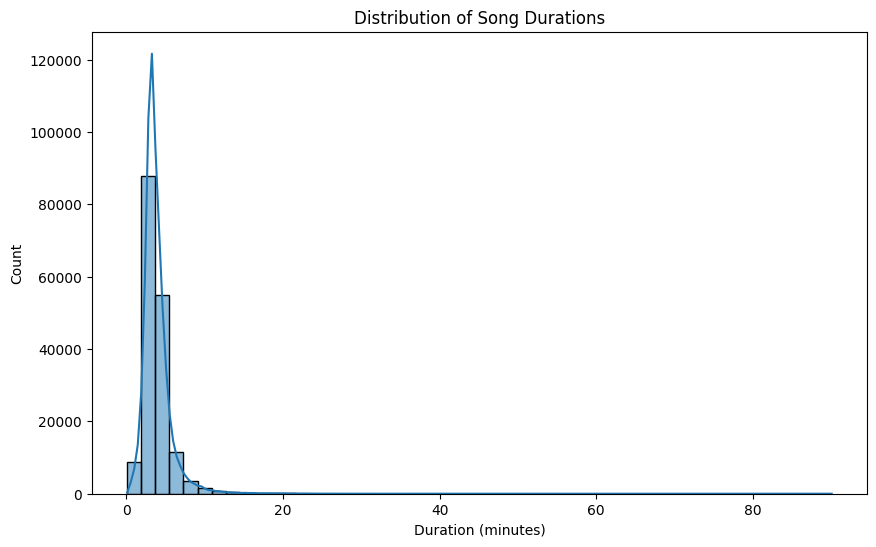

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['duration_ms'] / 60000, bins=50, kde=True)
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Song Durations')
plt.show()


## 7. [Follow-up] Can you make this plot more readable by removing outliers (extreme values)?

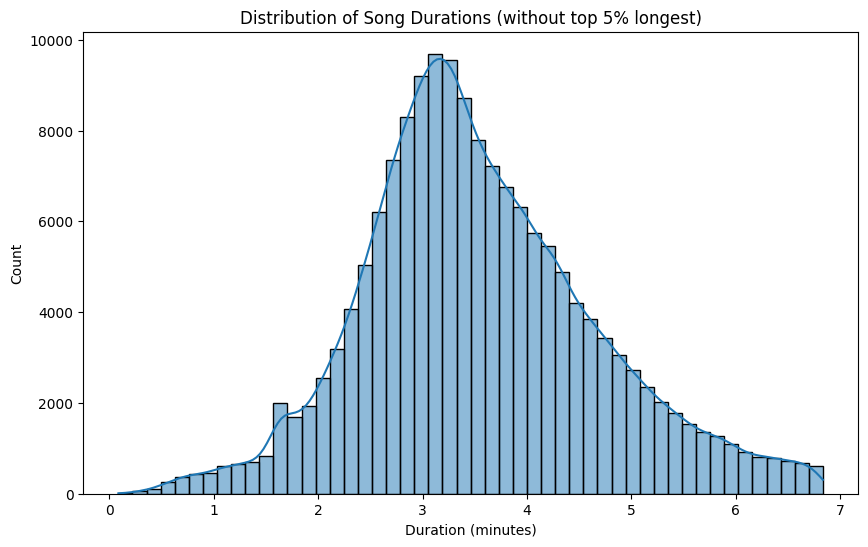

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

duration_min = df['duration_ms'] / 60000
filtered = duration_min[duration_min < duration_min.quantile(0.95)]

plt.figure(figsize=(10,6))
sns.histplot(filtered, bins=50, kde=True)
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Song Durations (without top 5% longest)')
plt.show()


We only remove 470 songs (out of almost 170k) and get a way more interesting plot!

## 8. What are the top 10 longest songs (duration)?

In [28]:
df.nlargest(10, 'duration_ms')[['name', 'duration_ms']]


,name,duration_ms
7411,Brown Noise - 90 Minutes,5403500
46972,Brown Noise for Sleep,4270034
54511,Midnight Thunderstorm Part 2,4269407
54675,Ocean Waves Sounds,4120258
125152,Ocean Waves for Sleep,4120258
38491,Dopesmoker,3816373
140784,Thursday Afternoon - 2005 Digital Remaster,3650800
72889,The Psychologically Ultimate Seashore (16 rpm),3557955
10573,Enta Oumry,3551152
118777,Naheg El Berda,3523619


## 9. How long would it take to listen to all the songs?

In [29]:
total_minutes = df['duration_ms'].sum() / 60000
total_minutes


np.float64(655299.81775)

This length is expressed in milliseconds, let's convert to days!

## 10. What are the top 10 most popular songs? We would like a DataFrame with only the columns `artists`, `name` and `popularity` as output!

In [32]:
df.nlargest(10, 'popularity')[['artists', 'name', 'popularity']]


,artists,name,popularity
87942,['The Weeknd'],Blinding Lights,100
87940,"['DaBaby', 'Roddy Ricch']",ROCKSTAR (feat. Roddy Ricch),99
87949,"['Powfu', 'beabadoobee']",death bed (coffee for your head) (feat. beabad...,97
87941,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",THE SCOTTS,96
87840,['Roddy Ricch'],The Box,95
87844,"['BENEE', 'Gus Dapperton']",Supalonely,95
87852,"['Surf Mesa', 'Emilee']",ily (i love you baby) (feat. Emilee),95
87946,['Drake'],Toosie Slide,95
87858,['Tones And I'],Dance Monkey,94
87943,['StaySolidRocky'],Party Girl,94


## 11. What is the most popular song before 2000?

In [33]:
df_pre2000 = df[df['release_date'] < '2000-01-01']
df_pre2000.loc[df_pre2000['popularity'].idxmax()][['artists', 'name', 'popularity']]


,82840
artists,['The Beatles']
name,Here Comes The Sun - Remastered 2009
popularity,83


## 12. Can you plot the distribution of `popularity`?

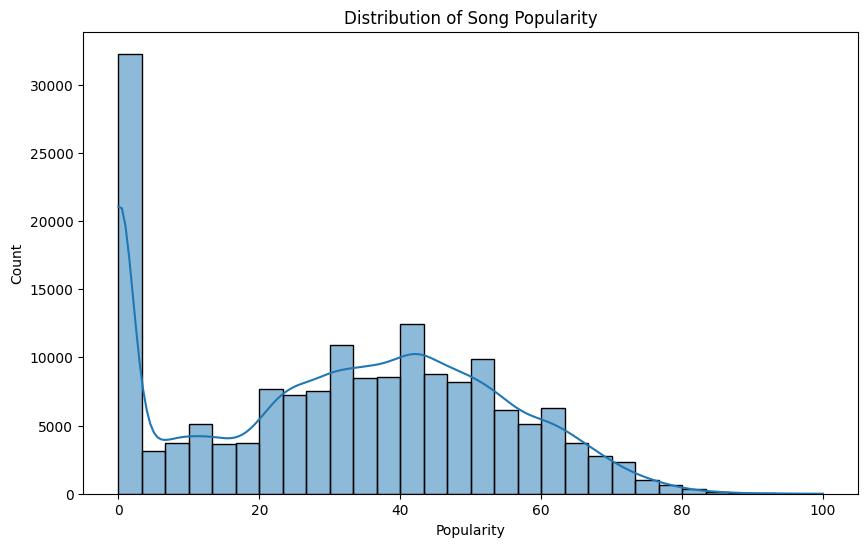

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.xlabel('Popularity')
plt.title('Distribution of Song Popularity')
plt.show()


## 13. What are the top 10 artists in terms of number of songs?

In [36]:
df['artists'].value_counts().head(10)


,count
artists,
['Эрнест Хемингуэй'],1215
['Francisco Canaro'],938
['Эрих Мария Ремарк'],781
['Ignacio Corsini'],620
['Frank Sinatra'],592
['Bob Dylan'],539
['The Rolling Stones'],512
['Johnny Cash'],502
['The Beach Boys'],491


## 14. [Follow-up] can you make a bar chart out of this result?

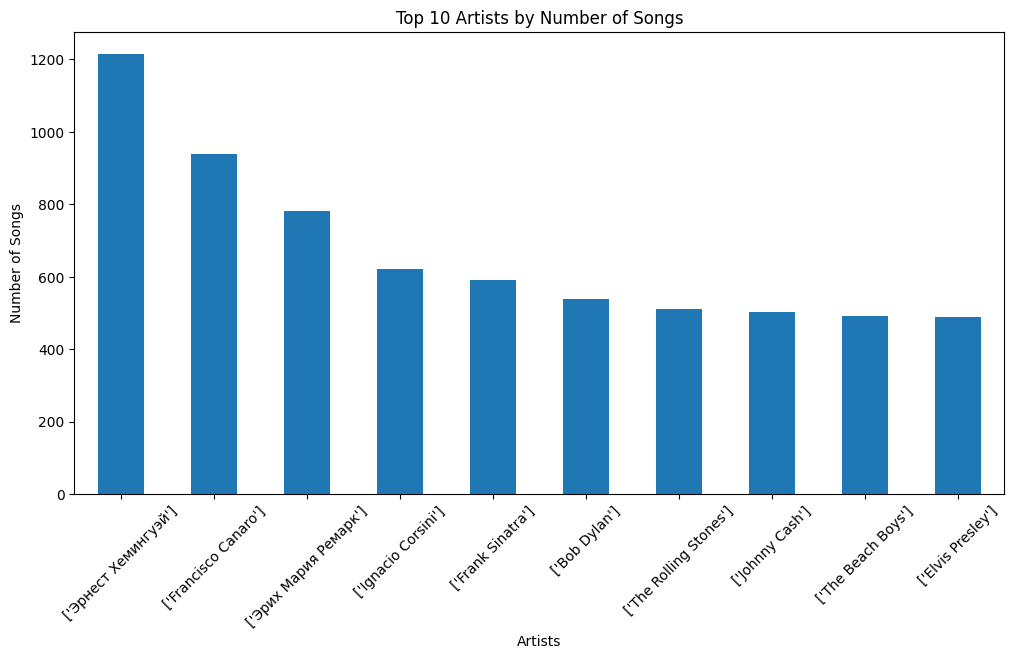

In [39]:
import matplotlib.pyplot as plt

top_artists = df['artists'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_artists.plot(kind='bar')
plt.xlabel('Artists')
plt.ylabel('Number of Songs')
plt.title('Top 10 Artists by Number of Songs')
plt.xticks(rotation=45)
plt.show()


## 15. How many songs by key?

In [40]:
df['key'].value_counts()


,count
key,
0,21499
7,20757
2,18821
9,17628
5,16336
4,12921
1,12816
10,12056
8,10711


## 16. [Follow-up] Can you plot a bar chart using Seaborn? Make sure the keys are sorted in a descending order.

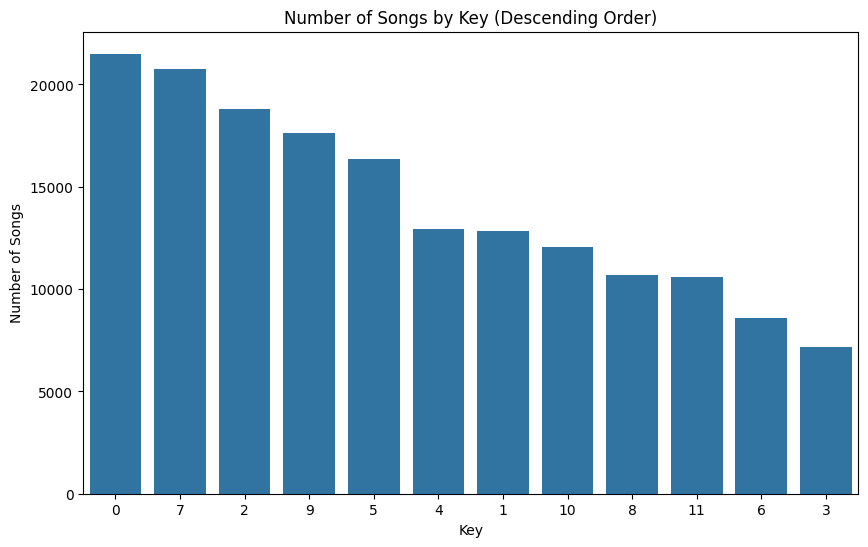

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

key_counts = df['key'].value_counts().sort_values(ascending=False).reset_index()
key_counts.columns = ['key', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=key_counts, x='key', y='count', order=key_counts['key'])
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Key (Descending Order)')
plt.show()


## 17. Can you plot a line graph representing the annual number of songs since 1921?

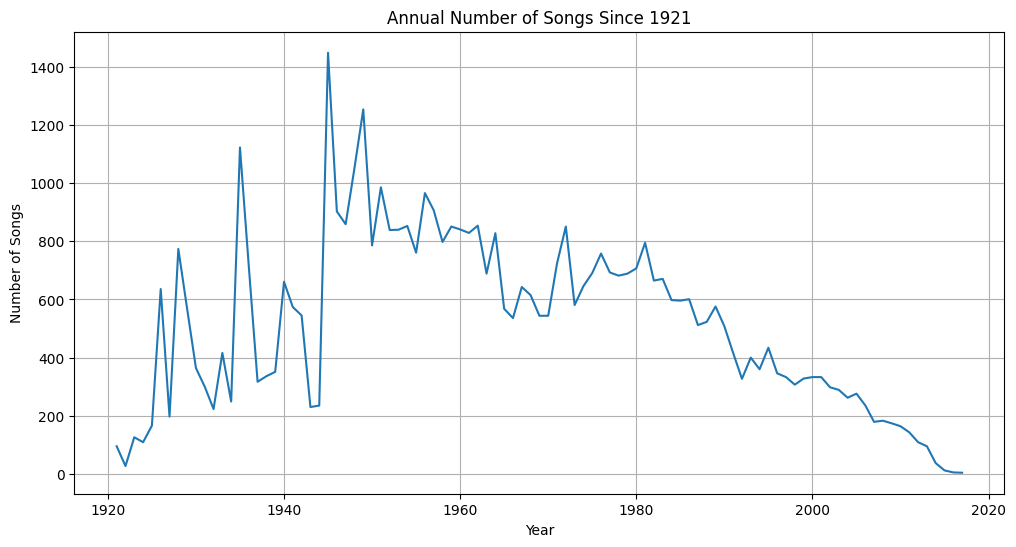

In [42]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
annual_counts = df[df['year'] >= 1921].groupby('year').size().reset_index(name='count')

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(annual_counts['year'], annual_counts['count'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Annual Number of Songs Since 1921')
plt.grid(True)
plt.show()


Last question! 👇

## 18. Can you visually check if there is relationship between `year` and `popularity`?

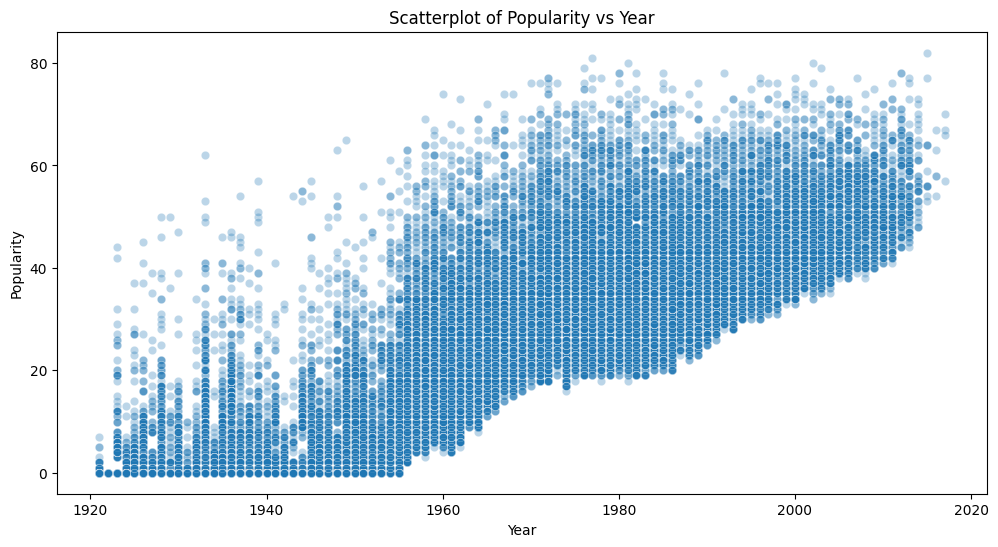

In [43]:
# import matplotlib.pyplot as plt
import seaborn as sns

df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='year', y='popularity', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Scatterplot of Popularity vs Year')
plt.show()


It seems that the popularity score has increased through time....